In [ ]:
!pip install imageio
!pip install scikit-image

^C
ERROR: Operation cancelled by user
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 89.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.9/222.9 kB 41.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.3/313.3 kB 55.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 111.2 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [ ]:
import numpy as np
import re
import os

#path_example = "train/buildings" 
#sample = os.listdir(path_example)
#print(sample)


def get_sort_dir(path):
    sample = os.listdir(path)
    num_sample = np.array(list(map(lambda x: re.findall(r'\d+', x), sample)))
    int_sample = list(map(lambda x: int(x), num_sample))
    int_sample = list(np.sort(int_sample))   
    new_list = list(map(lambda x: path + '/' + str(x)+'.jpg', int_sample))
    return new_list




In [ ]:
from skimage import data, color
from skimage.transform import rescale, resize
import tensorflow as tf
import pandas as pd
import numpy as np
import PIL.Image
import PIL
import os

buildings_dir = "train/buildings"
forest_dir = "train/forest"
glacier_dir = "train/glacier"
mountain_dir = "train/mountain"
sea_dir = "train/sea"
street_dir = "train/street"


buildings_path = list()
forest_path = list()
glacier_path = list()
mountain_path = list()
sea_path = list()
street_path = list()

buildings_path = get_sort_dir(buildings_dir)
forest_path = get_sort_dir(forest_dir)
glacier_path = get_sort_dir(glacier_dir)
mountain_path = get_sort_dir(mountain_dir)
sea_path = get_sort_dir(sea_dir)
street_path = get_sort_dir(street_dir)

"""
"""

2023-11-07 01:11:47.910126: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-07 01:11:48.035592: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-11-07 01:11:48.035626: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-11-07 01:11:48.066641: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-07 01:11:48.876507: W tensorflow/stream_executor/platform/de

KernelInterrupted: Execution interrupted by the Jupyter kernel.

2122


['train/buildings/0.jpg', 'train/buildings/1.jpg', 'train/buildings/10.jpg', 'train/buildings/20.jpg', 'train/buildings/21.jpg', 'train/buildings/22.jpg', 'train/buildings/23.jpg', 'train/buildings/24.jpg', 'train/buildings/25.jpg', 'train/buildings/26.jpg', 'train/buildings/27.jpg', 'train/buildings/28.jpg', 'train/buildings/29.jpg', 'train/buildings/30.jpg', 'train/buildings/31.jpg', 'train/buildings/32.jpg', 'train/buildings/33.jpg', 'train/buildings/34.jpg', 'train/buildings/35.jpg', 'train/buildings/36.jpg', 'train/buildings/37.jpg', 'train/buildings/38.jpg', 'train/buildings/39.jpg', 'train/buildings/40.jpg', 'train/buildings/41.jpg', 'train/buildings/42.jpg', 'train/buildings/43.jpg', 'train/buildings/44.jpg', 'train/buildings/45.jpg', 'train/buildings/46.jpg', 'train/buildings/48.jpg', 'train/buildings/49.jpg', 'train/buildings/50.jpg', 'train/buildings/51.jpg', 'train/buildings/52.jpg', 'train/buildings/54.jpg', 'train/buildings/56.jpg', 'train/buildings/57.jpg', 'train/buildi

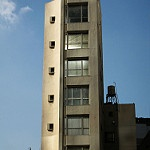

In [ ]:
print(buildings_path)
PIL.Image.open(str(buildings_path[15]))

In [ ]:
print(buildings_path[15])
print(forest_path[0])
print(glacier_path[0])

train/buildings/32.jpg
train/forest/8.jpg
train/glacier/10.jpg


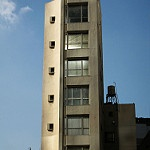

In [ ]:
PIL.Image.open(str(buildings_path[15]))

### Data Dimension Analysis on Buildings Data

['(150, 150, 3)', '(124, 150, 3)']
Min: (124, 150, 3)
CumSum:  2122
Min_100:  124


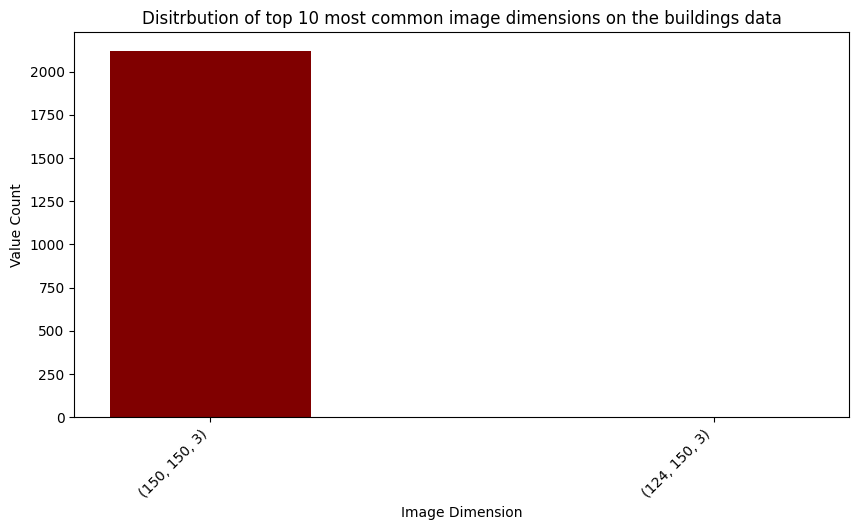

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from matplotlib import pyplot as plt
from matplotlib import image as mpimg
 
buildings_dimensions = list()
buildings_images = list()
for i in range(len(buildings_path)):
    image = mpimg.imread(buildings_path[i])
    dim = np.array(image).shape
    buildings_dimensions.append(dim)    
    buildings_images.append(np.array(image))
buildings_dim_count = pd.DataFrame(pd.value_counts(buildings_dimensions), columns=['count'])

buildings_dim_x = np.array(buildings_dim_count['count'])
buildings_dim_labels = list(map(lambda x: str(x), buildings_dim_count.index))
print(buildings_dim_labels)

print("Min:", min(buildings_dimensions))
print("CumSum: ", sum(buildings_dim_x[:20]))
print("Min_100: ", min( list(map(lambda x: x[1:4], buildings_dim_labels[:20])) ))

fig = plt.figure(figsize = (10, 5)) 
plt.bar(buildings_dim_labels[:20], buildings_dim_x[:20], color ='maroon', width = 0.4)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Value Count")
plt.xlabel("Image Dimension")
plt.title("Disitrbution of top 10 most common image dimensions on the buildings data")
plt.show()





In [ ]:
# We can view data coverage based on width and height shape constrains. 
sample = re.findall(r'\d+', str(buildings_dimensions[0]))[0]
print(sample)

buildings_dim_ = list(map(lambda x: int(re.findall(r'\d+', str(x))[1]), buildings_dimensions))
print(sum(np.array(buildings_dim_) >= 150))  

buildings_dim_ = list(map(lambda x: int(re.findall(r'\d+', str(x))[0]), buildings_dimensions))
print(sum(np.array(buildings_dim_) >= 150)) 

# Get data that is within our desired dimensions
new_buildings = np.array(buildings_images)[np.array(buildings_dim_) >= 150]
print(new_buildings[0].shape)


150
2122
2121
(150, 150, 3)
/tmp/ipykernel_37/944866485.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_buildings = np.array(buildings_images)[np.array(buildings_dim_) >= 150]


In [ ]:
resized_buildings = new_buildings.copy()
i=0
for image in new_buildings:    
    grayimage = color.rgb2gray(image)
    resized_image = resize(grayimage, (150, 150), anti_aliasing=True)    
    resized_buildings[i] = resized_image
    i += 1    

print(resized_buildings[0].shape)
print(new_buildings[0].shape)

print(resized_buildings.shape)
print(new_buildings.shape)

print(type(resized_buildings))

# Due to limited RAM I choose to only used 400 images per class.

resized_buildings = resized_buildings
print(resized_buildings.shape)

(150, 150)
(150, 150, 3)
(2121,)
(2121,)
<class 'numpy.ndarray'>
(2121,)


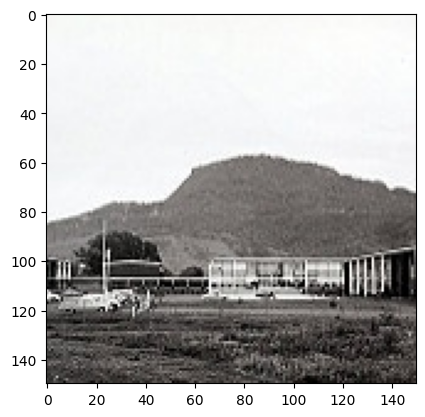

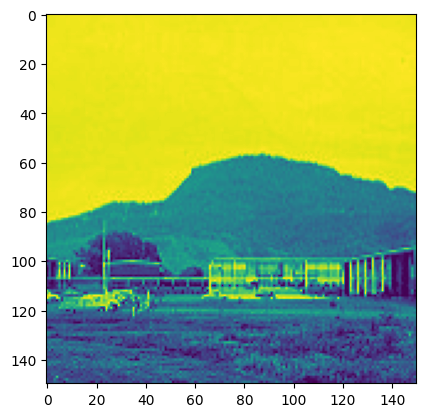

In [ ]:
plt.imshow(new_buildings[0])
plt.show()

plt.imshow(resized_buildings[0])
plt.show()

In [ ]:
#with open('resized_buildings.npy', 'wb') as f:    
#    np.save(f, resized_buildings)

np.save("resized_buildings.npy", resized_buildings)
print(list(map(lambda x: x.shape, resized_buildings[:10])))    

[(150, 150), (150, 150), (150, 150), (150, 150), (150, 150), (150, 150), (150, 150), (150, 150), (150, 150), (150, 150)]


In [ ]:
print(len(resized_buildings))
del resized_buildings
print(len(resized_buildings))

2121


NameError: name 'resized_buildings' is not defined

In [ ]:
resized_buildings = np.load("resized_buildings.npy", allow_pickle=True)
print(len(resized_buildings))

2121


### Same Procedure for Forest Data

['(150, 150, 3)', '(108, 150, 3)', '(113, 150, 3)', '(136, 150, 3)', '(115, 150, 3)', '(135, 150, 3)', '(133, 150, 3)']
Min: (108, 150, 3)
CumSum:  2271
Min_100:  108


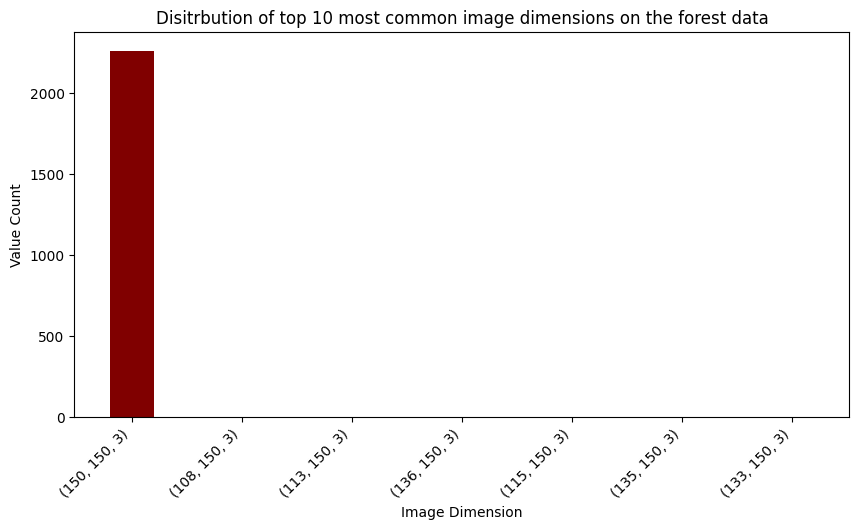

In [ ]:
# FIRST PART
forest_dimensions = list()
forest_images = list()
for i in range(len(forest_path)):
    image = mpimg.imread(forest_path[i])
    dim = np.array(image).shape
    forest_dimensions.append(dim)    
    forest_images.append(np.array(image))
forest_dim_count = pd.DataFrame(pd.value_counts(forest_dimensions), columns=['count'])

forest_dim_x = np.array(forest_dim_count['count'])
forest_dim_labels = list(map(lambda x: str(x), forest_dim_count.index))
print(forest_dim_labels)

print("Min:", min(forest_dimensions))
print("CumSum: ", sum(forest_dim_x[:20]))
print("Min_100: ", min( list(map(lambda x: x[1:4], forest_dim_labels[:20])) ))

fig = plt.figure(figsize = (10, 5)) 
plt.bar(forest_dim_labels[:20], forest_dim_x[:20], color ='maroon', width = 0.4)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Value Count")
plt.xlabel("Image Dimension")
plt.title("Disitrbution of top 10 most common image dimensions on the forest data")
plt.show()

In [ ]:
# SECOND PART
forest_dim_ = list(map(lambda x: int(re.findall(r'\d+', str(x))[1]), forest_dimensions))
print(sum(np.array(forest_dim_) >= 150))  

forest_dim_ = list(map(lambda x: int(re.findall(r'\d+', str(x))[0]), forest_dimensions))
print(sum(np.array(forest_dim_) >= 150)) 

# Get data that is within our desired dimensions
new_forest = np.array(forest_images)[np.array(forest_dim_) >= 150]
print(new_forest[0].shape)

# THIRD PART
resized_forest = new_forest.copy()
i=0
for image in new_forest:    
    grayimage = color.rgb2gray(image)
    resized_image = resize(grayimage, (150, 150), anti_aliasing=True)    
    resized_forest[i] = resized_image
    i += 1    

print(resized_forest[0].shape)
print(new_forest[0].shape)

print(resized_forest.shape)
print(new_forest.shape)

print(type(resized_forest))

# Due to limited RAM I choose to only used 400 images per class.

resized_forest = resized_forest
print(resized_forest.shape)

2271
2263
(150, 150, 3)
/tmp/ipykernel_37/3813932091.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_forest = np.array(forest_images)[np.array(forest_dim_) >= 150]
(150, 150)
(150, 150, 3)
(2263,)
(2263,)
<class 'numpy.ndarray'>
(2263,)


In [ ]:
np.save("resized_forest.npy", resized_forest)
print(list(map(lambda x: x.shape, resized_forest[:10])))    

[(150, 150), (150, 150), (150, 150), (150, 150), (150, 150), (150, 150), (150, 150), (150, 150), (150, 150), (150, 150)]


In [ ]:
print(len(resized_forest))
del resized_forest
print(len(resized_forest))

2263


NameError: name 'resized_forest' is not defined

In [ ]:
resized_forest = np.load("resized_forest.npy", allow_pickle=True)
print(len(resized_forest))

2263


### Glacier Data

['(150, 150, 3)', '(111, 150, 3)', '(143, 150, 3)', '(76, 150, 3)', '(149, 150, 3)', '(135, 150, 3)', '(123, 150, 3)', '(146, 150, 3)', '(105, 150, 3)', '(119, 150, 3)', '(142, 150, 3)', '(102, 150, 3)', '(134, 150, 3)', '(110, 150, 3)', '(97, 150, 3)', '(120, 150, 3)']
Min: (76, 150, 3)
CumSum:  2404
Min_100:  102


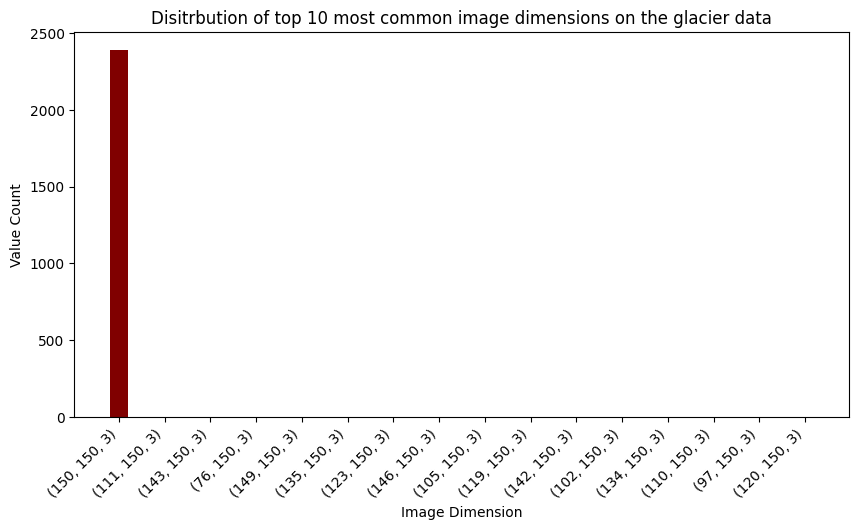

In [ ]:
# FIRST PART
glacier_dimensions = list()
glacier_images = list()
for i in range(len(glacier_path)):
    image = mpimg.imread(glacier_path[i])
    dim = np.array(image).shape
    glacier_dimensions.append(dim)    
    glacier_images.append(np.array(image))
glacier_dim_count = pd.DataFrame(pd.value_counts(glacier_dimensions), columns=['count'])

glacier_dim_x = np.array(glacier_dim_count['count'])
glacier_dim_labels = list(map(lambda x: str(x), glacier_dim_count.index))
print(glacier_dim_labels)

print("Min:", min(glacier_dimensions))
print("CumSum: ", sum(glacier_dim_x[:20]))
print("Min_100: ", min( list(map(lambda x: x[1:4], glacier_dim_labels[:20])) ))

fig = plt.figure(figsize = (10, 5)) 
plt.bar(glacier_dim_labels[:20], glacier_dim_x[:20], color ='maroon', width = 0.4)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Value Count")
plt.xlabel("Image Dimension")
plt.title("Disitrbution of top 10 most common image dimensions on the glacier data")
plt.show()

In [ ]:
# SECOND PART
glacier_dim_ = list(map(lambda x: int(re.findall(r'\d+', str(x))[1]), glacier_dimensions))
print(sum(np.array(glacier_dim_) >= 150))  

glacier_dim_ = list(map(lambda x: int(re.findall(r'\d+', str(x))[0]), glacier_dimensions))
print(sum(np.array(glacier_dim_) >= 150)) 

# Get data that is within our desired dimensions
new_glacier = np.array(glacier_images)[np.array(glacier_dim_) >= 150]
print(new_glacier[0].shape)

# THIRD PART
resized_glacier = new_glacier.copy()
i=0
for image in new_glacier:    
    grayimage = color.rgb2gray(image)
    resized_image = resize(grayimage, (150, 150), anti_aliasing=True)    
    resized_glacier[i] = resized_image
    i += 1    

print(resized_glacier[0].shape)
print(new_glacier[0].shape)

print(resized_glacier.shape)
print(new_glacier.shape)

print(type(resized_glacier))

# Due to limited RAM I choose to only used 400 images per class.

resized_glacier = resized_glacier
print(resized_glacier.shape)

2404
2387
(150, 150, 3)
/tmp/ipykernel_37/1596257807.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_glacier = np.array(glacier_images)[np.array(glacier_dim_) >= 150]
(150, 150)
(150, 150, 3)
(2387,)
(2387,)
<class 'numpy.ndarray'>
(2387,)


In [ ]:
np.save("resized_glacier.npy", resized_glacier)
print(list(map(lambda x: x.shape, resized_glacier[:10])))    

[(150, 150), (150, 150), (150, 150), (150, 150), (150, 150), (150, 150), (150, 150), (150, 150), (150, 150), (150, 150)]


In [ ]:
print(len(resized_glacier))
del resized_glacier
print(len(resized_glacier))

2387


NameError: name 'resized_glacier' is not defined

In [ ]:
resized_glacier = np.load("resized_glacier.npy", allow_pickle=True)
print(len(resized_glacier))

2387


### Mountain Data

['(150, 150, 3)', '(144, 150, 3)', '(143, 150, 3)', '(145, 150, 3)', '(134, 150, 3)', '(100, 150, 3)', '(113, 150, 3)', '(103, 150, 3)', '(131, 150, 3)', '(81, 150, 3)', '(142, 150, 3)', '(147, 150, 3)', '(146, 150, 3)', '(123, 150, 3)', '(135, 150, 3)', '(136, 150, 3)', '(141, 150, 3)']
Min: (81, 150, 3)
CumSum:  2512
Min_100:  100


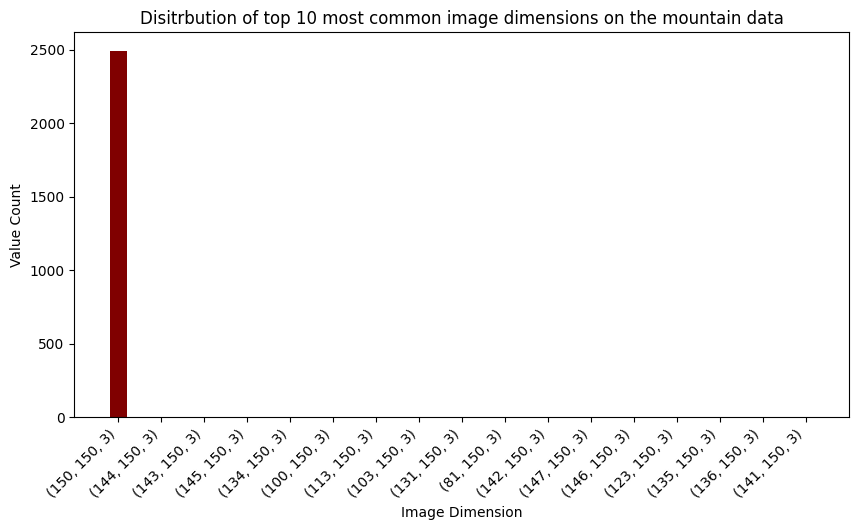

In [ ]:
# FIRST PART
mountain_dimensions = list()
mountain_images = list()
for i in range(len(mountain_path)):
    image = mpimg.imread(mountain_path[i])
    dim = np.array(image).shape
    mountain_dimensions.append(dim)    
    mountain_images.append(np.array(image))
mountain_dim_count = pd.DataFrame(pd.value_counts(mountain_dimensions), columns=['count'])

mountain_dim_x = np.array(mountain_dim_count['count'])
mountain_dim_labels = list(map(lambda x: str(x), mountain_dim_count.index))
print(mountain_dim_labels)

print("Min:", min(mountain_dimensions))
print("CumSum: ", sum(mountain_dim_x[:20]))
print("Min_100: ", min( list(map(lambda x: x[1:4], mountain_dim_labels[:20])) ))

fig = plt.figure(figsize = (10, 5)) 
plt.bar(mountain_dim_labels[:20], mountain_dim_x[:20], color ='maroon', width = 0.4)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Value Count")
plt.xlabel("Image Dimension")
plt.title("Disitrbution of top 10 most common image dimensions on the mountain data")
plt.show()

In [ ]:
# SECOND PART
mountain_dim_ = list(map(lambda x: int(re.findall(r'\d+', str(x))[1]), mountain_dimensions))
print(sum(np.array(mountain_dim_) >= 150))  

mountain_dim_ = list(map(lambda x: int(re.findall(r'\d+', str(x))[0]), mountain_dimensions))
print(sum(np.array(mountain_dim_) >= 150)) 

# Get data that is within our desired dimensions
new_mountain = np.array(mountain_images)[np.array(mountain_dim_) >= 150]
print(new_mountain[0].shape)

# THIRD PART
resized_mountain = new_mountain.copy()
i=0
for image in new_mountain:    
    grayimage = color.rgb2gray(image)
    resized_image = resize(grayimage, (150, 150), anti_aliasing=True)    
    resized_mountain[i] = resized_image
    i += 1    

print(resized_mountain[0].shape)
print(new_mountain[0].shape)

print(resized_mountain.shape)
print(new_mountain.shape)

print(type(resized_mountain))

# Due to limited RAM I choose to only used 400 images per class.

resized_mountain = resized_mountain
print(resized_mountain.shape)

2512
2495
(150, 150, 3)
/tmp/ipykernel_37/2450299752.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_mountain = np.array(mountain_images)[np.array(mountain_dim_) >= 150]
(150, 150)
(150, 150, 3)
(2495,)
(2495,)
<class 'numpy.ndarray'>
(2495,)


In [ ]:
np.save("resized_mountain.npy", resized_mountain)
print(list(map(lambda x: x.shape, resized_mountain[:10])))    

[(150, 150), (150, 150), (150, 150), (150, 150), (150, 150), (150, 150), (150, 150), (150, 150), (150, 150), (150, 150)]


In [ ]:
print(len(resized_mountain))
del resized_mountain
print(len(resized_mountain))

2495


NameError: name 'resized_mountain' is not defined

In [ ]:
resized_mountain = np.load("resized_mountain.npy", allow_pickle=True)
print(len(resized_mountain))

2495


### Sea Data

['(150, 150, 3)', '(113, 150, 3)', '(140, 150, 3)']
Min: (113, 150, 3)
CumSum:  2274
Min_100:  113


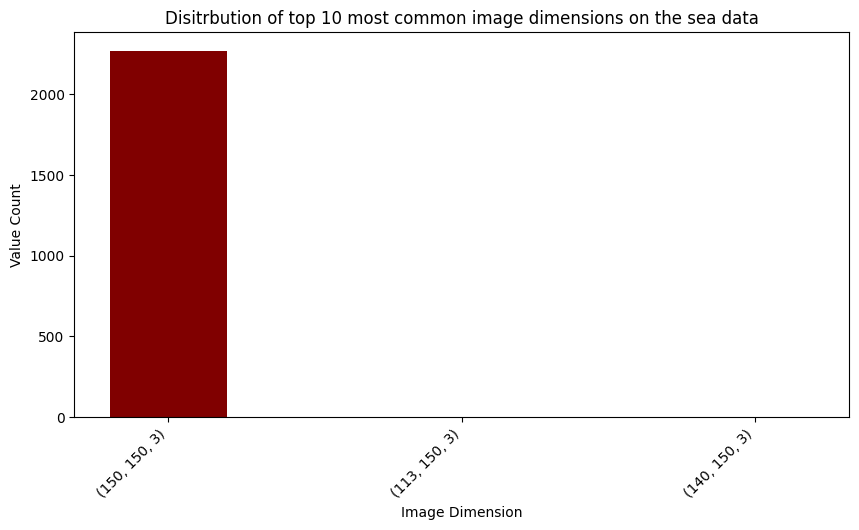

In [ ]:
# FIRST PART
sea_dimensions = list()
sea_images = list()
for i in range(len(sea_path)):
    image = mpimg.imread(sea_path[i])
    dim = np.array(image).shape
    sea_dimensions.append(dim)    
    sea_images.append(np.array(image))
sea_dim_count = pd.DataFrame(pd.value_counts(sea_dimensions), columns=['count'])

sea_dim_x = np.array(sea_dim_count['count'])
sea_dim_labels = list(map(lambda x: str(x), sea_dim_count.index))
print(sea_dim_labels)

print("Min:", min(sea_dimensions))
print("CumSum: ", sum(sea_dim_x[:20]))
print("Min_100: ", min( list(map(lambda x: x[1:4], sea_dim_labels[:20])) ))

fig = plt.figure(figsize = (10, 5)) 
plt.bar(sea_dim_labels[:20], sea_dim_x[:20], color ='maroon', width = 0.4)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Value Count")
plt.xlabel("Image Dimension")
plt.title("Disitrbution of top 10 most common image dimensions on the sea data")
plt.show()

In [ ]:
# SECOND PART
sea_dim_ = list(map(lambda x: int(re.findall(r'\d+', str(x))[1]), sea_dimensions))
print(sum(np.array(sea_dim_) >= 150))  

sea_dim_ = list(map(lambda x: int(re.findall(r'\d+', str(x))[0]), sea_dimensions))
print(sum(np.array(sea_dim_) >= 150)) 

# Get data that is within our desired dimensions
new_sea = np.array(sea_images)[np.array(sea_dim_) >= 150]
print(new_sea[0].shape)

# THIRD PART
resized_sea = new_sea.copy()
i=0
for image in new_sea:    
    grayimage = color.rgb2gray(image)
    resized_image = resize(grayimage, (150, 150), anti_aliasing=True)    
    resized_sea[i] = resized_image
    i += 1    

print(resized_sea[0].shape)
print(new_sea[0].shape)

print(resized_sea.shape)
print(new_sea.shape)

print(type(resized_sea))

# Due to limited RAM I choose to only used 400 images per class.

resized_sea = resized_sea
print(resized_sea.shape)

2274
2270
(150, 150, 3)
/tmp/ipykernel_37/1429453933.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_sea = np.array(sea_images)[np.array(sea_dim_) >= 150]
(150, 150)
(150, 150, 3)
(2270,)
(2270,)
<class 'numpy.ndarray'>
(2270,)


In [ ]:
np.save("resized_sea.npy", resized_sea)
print(list(map(lambda x: x.shape, resized_sea[:10])))    

[(150, 150), (150, 150), (150, 150), (150, 150), (150, 150), (150, 150), (150, 150), (150, 150), (150, 150), (150, 150)]


In [ ]:
print(len(resized_sea))
del resized_sea
print(len(resized_sea))

2270


NameError: name 'resized_sea' is not defined

In [ ]:
resized_sea = np.load("resized_sea.npy", allow_pickle=True)
print(len(resized_sea))

2270


### Street Data

['(150, 150, 3)', '(113, 150, 3)']
Min: (113, 150, 3)
CumSum:  2382
Min_100:  113


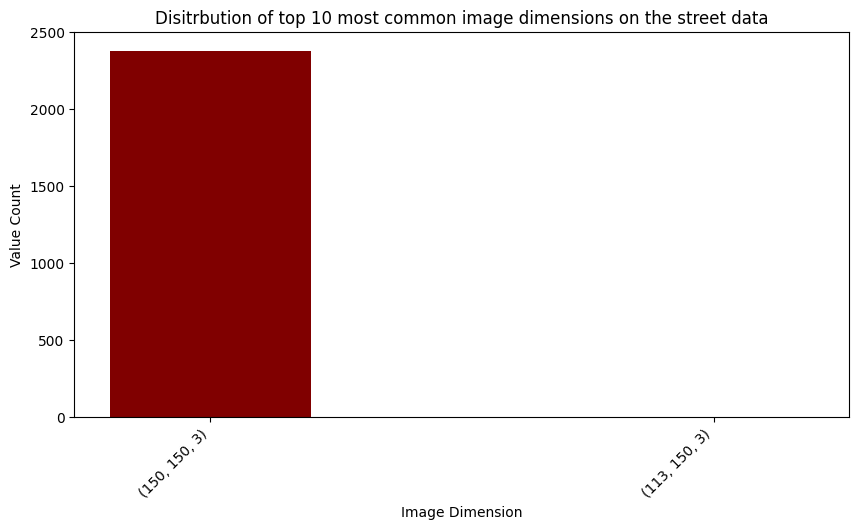

In [ ]:
# FIRST PART
street_dimensions = list()
street_images = list()
for i in range(len(street_path)):
    image = mpimg.imread(street_path[i])
    dim = np.array(image).shape
    street_dimensions.append(dim)    
    street_images.append(np.array(image))
street_dim_count = pd.DataFrame(pd.value_counts(street_dimensions), columns=['count'])

street_dim_x = np.array(street_dim_count['count'])
street_dim_labels = list(map(lambda x: str(x), street_dim_count.index))
print(street_dim_labels)

print("Min:", min(street_dimensions))
print("CumSum: ", sum(street_dim_x[:20]))
print("Min_100: ", min( list(map(lambda x: x[1:4], street_dim_labels[:20])) ))

fig = plt.figure(figsize = (10, 5)) 
plt.bar(street_dim_labels[:20], street_dim_x[:20], color ='maroon', width = 0.4)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Value Count")
plt.xlabel("Image Dimension")
plt.title("Disitrbution of top 10 most common image dimensions on the street data")
plt.show()

In [ ]:
# SECOND PART
street_dim_ = list(map(lambda x: int(re.findall(r'\d+', str(x))[1]), street_dimensions))
print(sum(np.array(street_dim_) >= 150))  

street_dim_ = list(map(lambda x: int(re.findall(r'\d+', str(x))[0]), street_dimensions))
print(sum(np.array(street_dim_) >= 150)) 

# Get data that is within our desired dimensions
new_street = np.array(street_images)[np.array(street_dim_) >= 150]
print(new_street[0].shape)

# THIRD PART
resized_street = new_street.copy()
i=0
for image in new_street:    
    grayimage = color.rgb2gray(image)
    resized_image = resize(grayimage, (150, 150), anti_aliasing=True)    
    resized_street[i] = resized_image
    i += 1    

print(resized_street[0].shape)
print(new_street[0].shape)

print(resized_street.shape)
print(new_street.shape)

print(type(resized_street))

# Due to limited RAM I choose to only used 400 images per class.

resized_street = resized_street
print(resized_street.shape)

2382
2381
(150, 150, 3)
/tmp/ipykernel_38/3935729070.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_street = np.array(street_images)[np.array(street_dim_) >= 150]
(150, 150)
(150, 150, 3)
(2381,)
(2381,)
<class 'numpy.ndarray'>
(2381,)


In [ ]:
np.save("resized_street.npy", resized_street)
print(list(map(lambda x: x.shape, resized_street[:10])))    

[(150, 150), (150, 150), (150, 150), (150, 150), (150, 150), (150, 150), (150, 150), (150, 150), (150, 150), (150, 150)]


In [ ]:
print(len(resized_street))
del resized_street
print(len(resized_street))

2381


NameError: name 'resized_street' is not defined

In [ ]:
resized_street = np.load("resized_street.npy", allow_pickle=True)
print(len(resized_street))

2381


### Restarting Notebook and Getting our Resized Images and Selecting 1500 per class

In [ ]:
import pandas as pd
import numpy as np

"""
with open("resized_buildings.npy", 'rb') as f:
    resized_buildings = np.load(f, allow_pickle=True)


with open("resized_forest.npy", 'rb') as f:
    resized_forest = np.load(f, allow_pickle=True)

with open("resized_glacier.npy", 'rb') as f:
    resized_glacier = np.load(f, allow_pickle=True)

with open("resized_mountain.npy", 'rb') as f:
    resized_mountain = np.load(f, allow_pickle=True)

"""
with open("resized_sea.npy", 'rb') as f:
    resized_sea = np.load(f, allow_pickle=True)



with open("resized_street.npy", 'rb') as f:
    resized_street = np.load(f, allow_pickle=True)




In [ ]:
#np.save("min_resized_buildings.npy", resized_buildings[:1500])
#np.save("min_resized_forest.npy", resized_forest[:1500])
#np.save("min_resized_glacier.npy", resized_glacier[:1500])
#np.save("min_resized_mountain.npy", resized_mountain[:1500])

#np.save("min_resized_sea.npy", resized_sea[:1500])
#np.save("min_resized_street.npy", resized_street[:1500])


In [ ]:
# GETTING MIN SAMPLE SIZE
import pandas as pd
import numpy as np

#resized_buildings = np.load("min_resized_buildings.npy", allow_pickle=True)
#resized_forest = np.load("min_resized_forest.npy", allow_pickle=True)
#resized_glacier = np.load("min_resized_glacier.npy", allow_pickle=True)
resized_mountain = np.load("min_resized_mountain.npy", allow_pickle=True)
resized_sea = np.load("min_resized_sea.npy", allow_pickle=True)
resized_street = np.load("min_resized_street.npy", allow_pickle=True)


In [ ]:
#print(len(resized_buildings))
#print(len(resized_forest))
#print(len(resized_glacier))
print(len(resized_mountain))
print(len(resized_sea))
print(len(resized_street))

1500
1500
1500


### Resizing Data Start

In [ ]:
new_street_data = []

for i in range(len(resized_street)):   # We used count of buildings since it is the smallest data set   
    new_street_data.append(resized_street[i])

new_street_data = np.array(new_street_data)    

print(new_street_data.shape)

(1500, 150, 150)


In [ ]:
np.save("new_street_data.npy", new_street_data)

In [ ]:
print(new_street_data.shape)
del new_street_data
print(new_street_data.shape)

(1500, 150, 150)
(1500, 150, 150)


In [ ]:
new_buildings_data = np.load("new_buildings_data.npy", allow_pickle=True)
print(new_buildings_data.shape)

(1500, 150, 150)


### Resizing Data End & Start Stacking Data

In [ ]:
# GETTING MIN SAMPLE SIZE
import pandas as pd
import numpy as np

new_buildings_data = np.load("new_buildings_data.npy", allow_pickle=True)
new_forest_data = np.load("new_forest_data.npy", allow_pickle=True)
new_glacier_data = np.load("new_glacier_data.npy", allow_pickle=True)
new_mountain_data = np.load("new_mountain_data.npy", allow_pickle=True)
new_sea_data = np.load("new_sea_data.npy", allow_pickle=True)
new_street_data = np.load("new_street_data.npy", allow_pickle=True)

In [ ]:
data = np.vstack((new_buildings_data, new_forest_data, new_glacier_data, new_mountain_data, new_sea_data, new_street_data))

In [ ]:
np.save("data.npy", data)

In [ ]:
import numpy as np
buildings_label = np.zeros(1500)
forest_label = np.ones(1500)
glacier_label = np.empty(1500)
mountain_label = np.empty(1500)
sea_label = np.empty(1500)
street_label = np.empty(1500)

glacier_label.fill(2)
mountain_label.fill(3)
sea_label.fill(4)
street_label.fill(5)

labels = np.concatenate((buildings_label, forest_label, glacier_label, mountain_label, sea_label, street_label))
print(buildings_label.shape)
print(forest_label.shape)
print(glacier_label.shape)
print(mountain_label.shape)
print(sea_label.shape)
print(street_label.shape)

print(labels.shape)



(1500,)
(1500,)
(1500,)
(1500,)
(1500,)
(1500,)
(9000,)


In [ ]:
np.save("labels.npy", labels)

### Ending Stacking Data

In [ ]:
new_buildings_data = []
new_forest_data = []
new_glacier_data = []
new_mountain_data = []
new_sea_data = []
new_street_data = []

for i in range(len(resized_buildings)):   # We used count of buildings since it is the smallest data set   
    new_buildings_data.append(resized_buildings[i])
    new_forest_data.append(resized_forest[i])
    new_glacier_data.append(resized_glacier[i])
    new_mountain_data.append(resized_mountain[i])
    new_sea_data.append(resized_sea[i])
    new_street_data.append(resized_street[i])

new_buildings_data = np.array(new_buildings_data)    
new_forest_data = np.array(new_forest_data)    
new_glacier_data = np.array(new_glacier_data)    
new_mountain_data = np.array(new_mountain_data)
new_sea_data = np.array(new_sea_data)
new_street_data = np.array(new_street_data)

print(new_buildings_data.shape)
print(new_forest_data.shape)
print(new_glacier_data.shape)
print(new_mountain_data.shape)
print(new_sea_data.shape)
print(new_street_data.shape)


data = np.vstack((new_buildings_data, new_forest_data, new_glacier_data, new_mountain_data, new_sea_data, new_street_data))


buildings_label = np.zeros(new_buildings_data.shape[0])
forest_label = np.ones(new_forest_data.shape[0])
glacier_label = np.empty(new_glacier_data.shape[0])
mountain_label = np.empty(new_mountain_data.shape[0])
sea_label = np.empty(new_sea_data.shape[0])
street_label = np.empty(new_street_data.shape[0])

glacier_label.fill(2)
mountain_label.fill(3)
sea_label.fill(4)
street_label.fill(5)

labels = np.concatenate((buildings_label, forest_label, glacier_label, mountain_label, sea_label, street_label))
print(buildings_label.shape)
print(forest_label.shape)
print(glacier_label.shape)
print(mountain_label.shape)
print(sea_label.shape)
print(street_label.shape)

print(data.shape)
print(labels.shape)


(1500, 150, 150)
(1500, 150, 150)
(1500, 150, 150)
(1500, 150, 150)
(1500, 150, 150)
(1500, 150, 150)


KernelInterrupted: Execution interrupted by the Jupyter kernel.

### Getting Finished Data and Labels

In [ ]:
import numpy as np
import pandas as pd

data = np.load("data.npy", allow_pickle=True)
labels = np.load("labels.npy", allow_pickle=True)

### Restarting Notebook and Loading Images as Numpy Arrays

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.25, random_state=42, shuffle=True)

print(X_train[0].shape)
print(X_train.shape)


(150, 150)
(6750, 150, 150)


In [ ]:
np.save("y_test.npy", y_test)

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf

X_train = np.load("X_train.npy", allow_pickle=True)
X_test = np.load("X_test.npy", allow_pickle=True)
y_train = np.load("y_train.npy", allow_pickle=True)
y_test = np.load("y_test.npy", allow_pickle=True)




2023-10-23 03:07:17.395164: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-23 03:07:18.046368: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-10-23 03:07:18.046405: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-10-23 03:07:18.079667: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-23 03:07:23.851449: W tensorflow/stream_executor/platform/de

In [ ]:
print(type(X_train))
print(type(y_train))
print(X_train[0].shape)

X_train = X_train.reshape(X_train.shape[0],150,150,1)
X_test = X_test.reshape(X_test.shape[0],150,150,1)

print(X_train.shape)
print(X_test.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(150, 150)
(6750, 150, 150, 1)
(2250, 150, 150, 1)


### Building Convolutional Neural Networks

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(64, 3, activation=tf.nn.relu, input_shape=(150, 150,1)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(6, activation=tf.nn.softmax))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')


2023-10-23 03:09:52.344380: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-10-23 03:09:52.344411: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-10-23 03:09:52.344428: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (p-22621d3f-1aef-4d62-8a06-efeb53490e25): /proc/driver/nvidia/version does not exist
2023-10-23 03:09:52.344629: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
print(y_train.shape)
model.fit(X_train, y_train)
print("Evaluate: ", model.evaluate(X_train, y_train))

(6750,)
2023-10-23 03:11:17.956385: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 607500000 exceeds 10% of free system memory.
2023-10-23 03:11:19.352202: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 179437568 exceeds 10% of free system memory.
2023-10-23 03:11:19.711609: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 179437568 exceeds 10% of free system memory.
  1/211 [..............................] - ETA: 4:19 - loss: 1.76192023-10-23 03:11:20.301347: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 179437568 exceeds 10% of free system memory.
2023-10-23 03:11:20.497457: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 179437568 exceeds 10% of free system memory.
211/211 [==============================] - 167s 791ms/step - loss: 3.0326


In [ ]:
modelResults = model.predict(X_train)
modelResults_ = np.argmax(modelResults, axis=1)
cm = tf.math.confusion_matrix(y_train, modelResults_)
print(cm)
print(sum(modelResults_ == y_train)/len(y_train))

211/211 [==============================] - 43s 204ms/step
0.8534814814814815


In [ ]:
modelResults = model.predict(X_test)

modelResults_ = np.argmax(modelResults, axis=1)
cm = tf.math.confusion_matrix(y_test, modelResults_)
print(cm)
print(sum(modelResults_ == y_test)/len(y_test))

71/71 [==============================] - 15s 204ms/step
tf.Tensor(
[[204  15  17  15  16 115]
 [  5 284  14   5   1  52]
 [  3   2 272  50  32  16]
 [  9   2  45 229  70  21]
 [ 11   3  90  60 208   8]
 [ 28  11  10   3   5 319]], shape=(6, 6), dtype=int32)
0.6737777777777778


In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3,3), input_shape=(150, 150, 1), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(6, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
es = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=10)
model.fit(X_train, y_train, epochs=20, callbacks=[es])

KernelInterrupted: Execution interrupted by the Jupyter kernel.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=22621d3f-1aef-4d62-8a06-efeb53490e25' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>